In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

/usr/local/Cellar/python/3.7.0/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


In [2]:
mnist = tf.keras.datasets.mnist # hand-written digits

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [6]:
print(y_train[0])

5


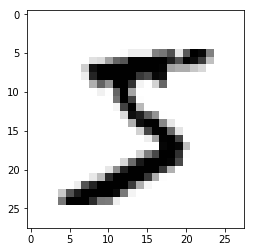

In [7]:
plt.imshow(x_train[0], cmap=plt.cm.binary)

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 8s 130us/step - loss: 0.2026 - acc: 0.9397
Epoch 2/5
60000/60000 [==============================] - 8s 126us/step - loss: 0.0794 - acc: 0.9763
Epoch 3/5
60000/60000 [==============================] - 8s 127us/step - loss: 0.0529 - acc: 0.9838
Epoch 4/5
60000/60000 [==============================] - 8s 127us/step - loss: 0.0355 - acc: 0.9884
Epoch 5/5
10000/10000 [==============================] - 0s 29us/step


[0.0743346467040974, 0.9781]

In [11]:
# model.save('simple_text.model')

NotImplementedError: Currently `save` requires model to be a graph network. Consider using `save_weights`, in order to save the weights of the model.

In [12]:
# model.save_weights('simple_text.weights')


Consider using a TensorFlow optimizer from `tf.train`.


ValueError: Parent directory of simple_text.weights doesn't exist, can't save.

In [13]:
predictions = model.predict([x_test])   # Need to feed in a list

In [14]:
import numpy as np

In [15]:
np.argmax(predictions[0])

7

In [ ]:
plt.figure(figsize=(10, 1), dpi=100)
for k in np.arange(8):
    ax = plt.subplot(1, 8, k + 1)
    plt.imshow(x_test[k], cmap=plt.cm.binary)
    plt.title('{}'.format(np.argmax(predictions[k])))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)